# Подключение диска

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive') # Подключаю гугл диск

Mounted at /content/drive


# Разрезание карт на картинки

In [ ]:
# Загружаю необходимые библиотеки
import os
import time
import numpy as np
from google.colab                   import drive
from tensorflow.keras.preprocessing import image

In [ ]:
# Функция формирования имени файла map-xxxx.png
def FileName(n, path_img):
    s = ''
    if n < 1000: s =   '0'
    if n <  100: s =  '00'
    if n <   10: s = '000'
    return path_img + 'map-' + s + str(n) + '.png'

In [ ]:
# Создаю картинки из карт
cur_time    = time.time() # Засекаю текущее время
path_maps   = '/content/drive/My Drive/MSP/Maps/' # Директория с картами
path_images = '/content/drive/My Drive/MSP/Images/' # Директория с картинками
img_height  = 512 # Высота изображения
img_width   = 512 # Ширина изображения 
# images_maps = []
# images      = []
list_files  = sorted(os.listdir(path_maps)) # Список названий файлов с картами
index       = 0 # Номер карты
for filename in list_files:
    print('Карта', index+1, 'из', len(list_files), end='')
    map = image.img_to_array(image.load_img(os.path.join(path_maps, filename))) # Загружаю карту
    
    map_height = map.shape[0] # Узнаю высоту карты
    map_width  = map.shape[1] # Узнаю ширину карты
    
    number_height = map_height // img_height # Считаю количество картинок по высоте
    if map_height % number_height < img_height // 2 : number_height -= 1 # Увеличиваю узкие поля
    frame_height  = (map_height - (number_height * img_height)) // 2 # Делаю отступ от края по высоте

    number_width = map_width // img_width # Считаю количество картинок по ширине
    if map_width % number_width < img_width // 2 : number_width -= 1 # Увеличиваю узкие поля
    frame_width  = (map_width - (number_width * img_width)) // 2 # делаю отступ от края по ширине
    
    for i in range(number_height):
        for j in range(number_width):
            images = map[i*img_height+frame_height:(i+1)*img_height+frame_height, j*img_width+frame_width:(j+1)*img_width+frame_width] # Вырезаю картинку из карты
            image.save_img(FileName(index * number_height * number_width + i * number_height + j, path_images), image.array_to_img(images)) # Сохраняю картинку в файл
    print('\r', end='')
    index += 1
print ('Карты обработаны. Время обработки: ', round(time.time() - cur_time), ' c.', sep='')

Карты обработаны. Время обработки: 618 c.


# Вывод на экран 5 случайных картинок из файлов

In [ ]:
# Загружаю необходимые библиотеки
import matplotlib.pyplot as plt

In [ ]:
img_path = '/content/drive/My Drive/MSP/Sources/' # Директория с файлами
os.chdir(img_path) # Устанавливаю текущую директорию
img_name = os.listdir() # Создаю список файлов в директории

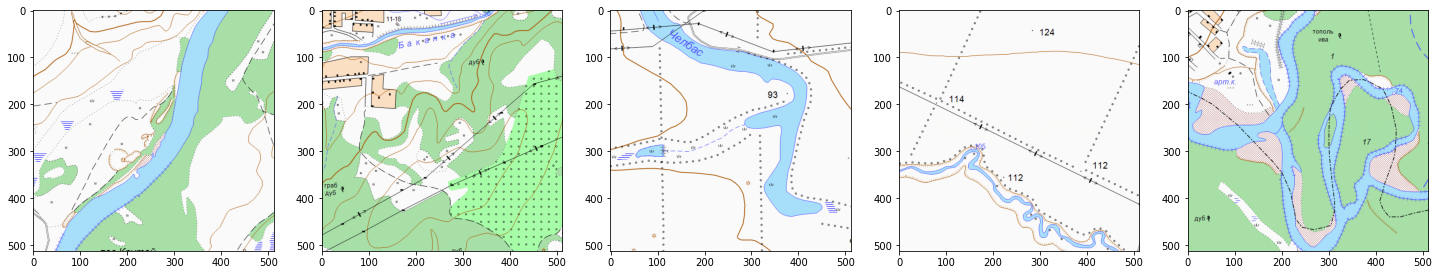

In [ ]:
# Вывожу на экран 5 случайных картинок
fig, axs = plt.subplots(1, 5, figsize=(25, 5)) # Создание ряда изображений
for i in range(5):
    index = random.randint(0, len(img_name))
    img = image.load_img(os.path.join(img_path, img_name[index]))
    axs[i].imshow(img)
plt.show()

# Очистка картинок

## Функция разметки

In [ ]:
# Объявляю функцию обработки картинки
# Меняю цвет фона на заданный черный
# Меняю цвет реки на заданный синий
# Меняю цвет тропы на заданный желтый
# Меняю цвет асфальтированной дороги на заданный красный
# Меняю цвет грунтовой дороги на заданный оранжевый

def ClearImg(img, img_height = 512, img_width = 512):

    color_font    = [   0,   0,   0] # Задаю цвет фона - меняю
    color_river   = [   0, 140, 240] # Задаю цвет реки - меняю
    color_asphalt = [ 240,   0,   0] # Задаю цвет асфальтированной дороги - меняю
    color_dirt    = [ 240, 140,   0] # Задаю цвет грунтовой дороги - меняю
    color_trail   = [ 240, 240,   0] # Задаю цвет тропы - меняю
    color_build   = [ 240,   0, 240] # Задаю цвет здания - рисую
    color_rock    = [ 140, 140,   0] # Задаю цвет скалы - рисую
    color_lake    = [   0, 240, 240] # Задаю цвет озера - рисую
    color_glacier = [   0,   0, 240] # Задаю цвет ледника - рисую
    color_bridge  = [ 140,   0,   0] # Задаю цвет моста - рисую
    color_list    = np.array([color_river , color_asphalt , color_dirt , color_trail , color_build , color_rock , color_lake , color_glacier , color_bridge])

    for i in range(img_height):
        for j in range(img_width):
            
            if  img[i][j][0] in [169, 170, 171, 176]                   : img[i][j] = color_font # Убираю линии горизонтали
            if  img[i][j][1] ==       177                              : img[i][j] = color_font # Убираю тёмно-зеленый цвет
            if (img[i][j]    == [168, 224, 168]).all()                 : img[i][j] = color_font # Убираю зеленый цвет
            if (img[i][j]    == [168, 253, 168]).all()                 : img[i][j] = color_font # Убираю светло-зеленый цвет
            if (img[i][j]    == [255, 255, 255]).all()                 : img[i][j] = color_font # Убираю белый цвет
            if (img[i][j]    == [252, 252, 252]).all()                 : img[i][j] = color_font # Убираю белый цвет
            if (img[i][j]    == [251, 251, 251]).all()                 : img[i][j] = color_font # Убираю белый цвет
            if (img[i][j]    == [250, 250, 250]).all()                 : img[i][j] = color_font # Убираю белый цвет
            # if (img[i][j]    == [129,   0,   0]).all()                 : img[i][j] = color_font # Убираю бордовый цвет
            
            # Меняю цвет тропы
            if not (img[i][j] in color_list[4:]) :
                if (img[i][j][1] <= 200) and (img[i][j][1] >= img[i][j][0]) and (img[i][j][1] >= img[i][j][2]) : img[i][j] = color_trail
            
            # Меняю цвет грунта
            if not (img[i][j] in color_list[3:]) :
                if (img[i][j][1] == img[i][j][0]) and (img[i][j][1] == img[i][j][2]) and (img[i][j][0] == img[i][j][2]) : img[i][j] = color_dirt
            
            # Меняю цвет асфальта
            if not (img[i][j] in color_list[2:]) :
                if (img[i][j][0] >= img[i][j][1]) and (img[i][j][1] >= img[i][j][2]) : img[i][j] = color_asphalt
            
            # Меняю цвет реки
            if not (img[i][j] in color_list[1:]) :
                if (img[i][j][0] <= img[i][j][1]) and (img[i][j][1] <= img[i][j][2]) : img[i][j] = color_river
                
            # Меняю цвет фона
            if not (img[i][j] in color_list[0:]) : img[i][j] = color_font

    return img

## Разметка всех картинок

In [ ]:
# Размечаю картинки цветом
cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = sorted(os.listdir(img_path)) # Создаю список файлов в директории
img        = []
i = 1
for filename in img_name:
    print('Картинка', i, 'из', len(img_name), end='')
    img = image.img_to_array(image.load_img(os.path.join(img_path, filename)))
    img = ClearImg(img)
    image.save_img(os.path.join(img_path, filename), image.array_to_img(img))
    print('\r', end='')
    i += 1
print ('Картинки обработаны. Время обработки:', round(time.time() - cur_time), 'c.')
print ('Количество картинок:', len(img_name)) # Отображаю количество элементов в обучающей выборке

Картинки обработаны. Время обработки: 782 c.
Количество картинок: 40


## Дополнительная разметка по частям

In [ ]:
# Размечаю картинки цветом
cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = sorted(['map-0552.png','map-0575.png','map-0625.png','map-0657.png','map-0699.png',
                     'map-0877.png','map-0961.png','map-0962.png','map-0974.png','map-0975.png',
                     'map-0976.png','map-1018.png','map-1037.png','map-1038.png','map-1054.png',
                     'map-1070.png','map-1072.png','map-1128.png','map-1129.png','map-1130.png',
                     'map-1142.png','map-1143.png','map-1153.png','map-1189.png','map-1077.png']) # Создаю список файлов в директории
img        = []
color_font = [   0,   0,   0] # Задаю цвет фона - меняю
k = 1
for filename in img_name:
    print('Картинка', k, 'из', len(img_name), filename, end='')
    img = image.img_to_array(image.load_img(os.path.join(img_path, filename)))

    for i in range(img_height):
        for j in range(img_width):

            if (img[i][j] == [255,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [249, 243, 238]).all() : img[i][j] = color_font
            if (img[i][j] == [249,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [249, 239, 227]).all() : img[i][j] = color_font
            if (img[i][j] == [240, 230, 219]).all() : img[i][j] = color_font
            # if (img[i][j] == [249, 243, 238]).all() : img[i][j] = color_font
            # if (img[i][j] == [246,   0,   0]).all() : img[i][j] = color_font
            # if (img[i][j] == [247,   0,   0]).all() : img[i][j] = color_font
            # if (img[i][j] == [248,   0,   0]).all() : img[i][j] = color_font

        
    image.save_img(os.path.join(img_path, filename), image.array_to_img(img))
    print('\r', end='')
    k += 1
print ('Картинки обработаны. Время обработки:', round(time.time() - cur_time), 'c.')
print ('Количество картинок:', len(img_name)) # Отображаю количество элементов в обучающей выборке

In [ ]:
# Размечаю картинки цветом
cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = ['map-0877.png','map-1038.png','map-1128.png','map-1129.png','map-1130.png','map-1153.png'] # Создаю список файлов в директории
img        = []
color_font = [   0,   0,   0] # Задаю цвет фона - меняю
k = 1
for filename in img_name:
    print('Картинка', k, 'из', len(img_name), filename, end='')
    img = image.img_to_array(image.load_img(os.path.join(img_path, filename)))

    for i in range(img_height):
        for j in range(img_width):

            if (img[i][j] == [247, 237, 226]).all() : img[i][j] = color_font
            if (img[i][j] == [247, 247,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [248, 238, 227]).all() : img[i][j] = color_font
            if (img[i][j] == [242, 232, 221]).all() : img[i][j] = color_font
            if (img[i][j] == [247, 241, 236]).all() : img[i][j] = color_font
            if (img[i][j] == [240, 230, 220]).all() : img[i][j] = color_font
            if (img[i][j] == [240, 240,   0]).all() : img[i][j] = color_font
                    
    image.save_img(os.path.join(img_path, filename), image.array_to_img(img))
    print('\r', end='')
    k += 1
print ('Картинки обработаны. Время обработки:', round(time.time() - cur_time), 'c.')
print ('Количество картинок:', len(img_name)) # Отображаю количество элементов в обучающей выборке

In [ ]:
# Размечаю картинки цветом
cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = sorted(os.listdir(img_path)) # Создаю список файлов в директории] # Создаю список файлов в директории

img           = []
color_font    = [   0,   0,   0] # Задаю цвет фона - меняю
color_river   = [   0, 140, 240] # Задаю цвет реки - меняю
color_trail   = [ 240, 240,   0] # Задаю цвет тропы - меняю
k = 1
for filename in img_name:
    print('Картинка', k, 'из', len(img_name), filename, end='')
    img = image.img_to_array(image.load_img(os.path.join(img_path, filename)))

    for i in range(img_height):
        for j in range(img_width):

            if (img[i][j] == [249,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [242,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [243,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [244,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [247,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [248,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [255,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [176,  88,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [172,  86,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [174,  86,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [170,  85,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [178,  89,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [180,  90,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [ 97, 106, 241]).all() : img[i][j] = color_river
            if (img[i][j] == [  0, 141, 241]).all() : img[i][j] = color_river
            if (img[i][j] == [  0, 144, 247]).all() : img[i][j] = color_river
            if (img[i][j] == [  0, 148, 255]).all() : img[i][j] = color_river
            if (img[i][j] == [241, 241,   0]).all() : img[i][j] = color_trail
            if (img[i][j] == [248, 248,   0]).all() : img[i][j] = color_trail
            if (img[i][j] == [107, 145, 107]).all() : img[i][j] = color_trail
            if (img[i][j] == [144, 172, 144]).all() : img[i][j] = color_trail
            if (img[i][j] == [240, 230, 219]).all() : img[i][j] = color_font
            if (img[i][j] == [249, 243, 238]).all() : img[i][j] = color_font
            if (img[i][j] == [248, 238, 227]).all() : img[i][j] = color_font
                    
    image.save_img(os.path.join(img_path, filename), image.array_to_img(img))
    print('\r', end='')
    k += 1
print ('Картинки обработаны. Время обработки:', round(time.time() - cur_time), 'c.')
print ('Количество картинок:', len(img_name)) # Отображаю количество элементов в обучающей выборке

Картинки обработаны. Время обработки: 502 c.
Количество картинок: 40


In [ ]:
# Размечаю картинки цветом
cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = sorted(os.listdir(img_path)) # Создаю список файлов в директории] # Создаю список файлов в директории

img           = []
color_font    = [   0,   0,   0] # Задаю цвет фона - меняю
color_river   = [   0, 140, 240] # Задаю цвет реки - меняю
color_asphalt = [ 240,   0,   0] # Задаю цвет асфальтированной дороги - меняю
color_dirt    = [ 240, 140,   0] # Задаю цвет грунтовой дороги - меняю
color_trail   = [ 240, 240,   0] # Задаю цвет тропы - меняю
color_build   = [ 240,   0, 240] # Задаю цвет здания - рисую
color_rock    = [ 140, 140,   0] # Задаю цвет скалы - рисую
color_lake    = [   0, 240, 240] # Задаю цвет озера - рисую
color_glacier = [   0,   0, 240] # Задаю цвет ледника - рисую
color_bridge  = [ 140,   0,   0] # Задаю цвет моста - рисую
k = 1
for filename in img_name:
    print('Картинка', k, 'из', len(img_name), filename, end='')
    img = image.img_to_array(image.load_img(os.path.join(img_path, filename)))

    for i in range(img_height):
        for j in range(img_width):

            if (img[i][j] == [240, 240,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [241, 241,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [242, 242,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [243, 243,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [244, 244,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [247, 247,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [248, 248,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [249, 249,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [255, 255,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [252,   0,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [179,  89,   0]).all() : img[i][j] = color_font
            if (img[i][j] == [145, 145,   0]).all() : img[i][j] = color_rock
            if (img[i][j] == [144, 144,   0]).all() : img[i][j] = color_rock
            if (img[i][j] == [142, 142,   0]).all() : img[i][j] = color_rock
            if (img[i][j] == [  0, 247, 247]).all() : img[i][j] = color_lake
            if (img[i][j] == [  0, 243, 243]).all() : img[i][j] = color_lake
            if (img[i][j] == [  0,   0, 255]).all() : img[i][j] = color_glacier
            if (img[i][j] == [  0,   0, 244]).all() : img[i][j] = color_glacier
            if (img[i][j] == [247,   0, 247]).all() : img[i][j] = color_build
            if (img[i][j] == [243,   0, 243]).all() : img[i][j] = color_build
            if (img[i][j] == [241,   0, 241]).all() : img[i][j] = color_build
            if (img[i][j] == [145,   0,   0]).all() : img[i][j] = color_bridge
            if (img[i][j] == [  0, 142, 244]).all() : img[i][j] = color_river
            if (img[i][j] == [  0, 142, 243]).all() : img[i][j] = color_river
            if (img[i][j] == [ 98, 107, 243]).all() : img[i][j] = color_river
            if (img[i][j] == [244, 234, 223]).all() : img[i][j] = color_font
            if (img[i][j] == [249, 239, 227]).all() : img[i][j] = color_font
                    
    image.save_img(os.path.join(img_path, filename), image.array_to_img(img))
    print('\r', end='')
    k += 1
print ('Картинки обработаны. Время обработки:', round(time.time() - cur_time), 'c.')
print ('Количество картинок:', len(img_name)) # Отображаю количество элементов в обучающей выборке

Картинки обработаны. Время обработки: 1806 c.
Количество картинок: 40


## Разметка картинок по одной

In [ ]:
# Картинка map-2239.png

cur_time   = time.time() # Засекаю текущее время
img_height = 512 # Высота изображения
img_width  = 512 # Ширина изображения
img_path   = '/content/drive/My Drive/MSP/Marked/' # Директория с файлами
img_name   = 'map-2239.png'
img        = []

color_font = [   0,   0,   0] # Задаю цвет фона - меняю

img = image.img_to_array(image.load_img(os.path.join(img_path, img_name)))

for i in range(img_height):
    for j in range(img_width):

        if (img[i][j] == [247, 241, 236]).all() : img[i][j] = color_font
        #if (img[i][j] == [240, 230, 219]).all() : img[i][j] = color_font
        #if (img[i][j] == [240, 140,   0]).all() : img[i][j] = color_font
        

image.save_img(os.path.join(img_path, img_name), image.array_to_img(img))

print ('Картинка обработана. Время обработки:', round(time.time() - cur_time), 'c.')

Картинка обработана. Время обработки: 3 c.


# Загрузка картинок

In [ ]:
# Загружаю необходимые библиотеки

import os
import time
import random
import matplotlib.pyplot              as     plt
from   tensorflow.keras.preprocessing import image

In [ ]:
img_width  = 512 # Ширина изображения 
img_height = 512 # Высота изображения
img_path_objects  = '/content/drive/My Drive/MSP/Sources/'   # Директория с исходными    файлами
img_path_segments = '/content/drive/My Drive/MSP/Marked/' # Директория с размеченными файлами

In [ ]:
# Функция загрузки картинок

def Img_load(img_path_):
    cur_time = time.time() # Засекаю текущее время
    images_ = []
    list_files = sorted(os.listdir(img_path_))
    count = len(list_files)
    i = 1
    for filename in list_files:
        print('Картинка', i, 'из', count, end='')
        images_.append(image.load_img(os.path.join(img_path_, filename), target_size=(img_height, img_width)))
        print('\r', end='')
        i += 1
    print ('Выборка загржуена. Время загрузки:', round(time.time() - cur_time), 'c.', 'Количество изображений:', len(images_))
    return images_

In [ ]:
# Загрузка исходных картинок

images_objects_train = Img_load(img_path_objects + 'train') # обучающие
images_objects_val   = Img_load(img_path_objects + 'val'  ) # проверочные
images_objects_test  = Img_load(img_path_objects + 'test' ) # тестовые

Выборка загржуена. Время загрузки: 38 c. Количество изображений: 80
Выборка загржуена. Время загрузки: 4 c. Количество изображений: 10
Выборка загржуена. Время загрузки: 4 c. Количество изображений: 10


In [ ]:
# Загрузка размеченных картинок

images_segments_train = Img_load(img_path_segments + 'train') # обучающие
images_segments_val   = Img_load(img_path_segments + 'val'  ) # проверочные
images_segments_test  = Img_load(img_path_segments + 'test' ) # тестовые

Выборка загржуена. Время загрузки: 33 c. Количество изображений: 80
Выборка загржуена. Время загрузки: 4 c. Количество изображений: 10
Выборка загржуена. Время загрузки: 5 c. Количество изображений: 10


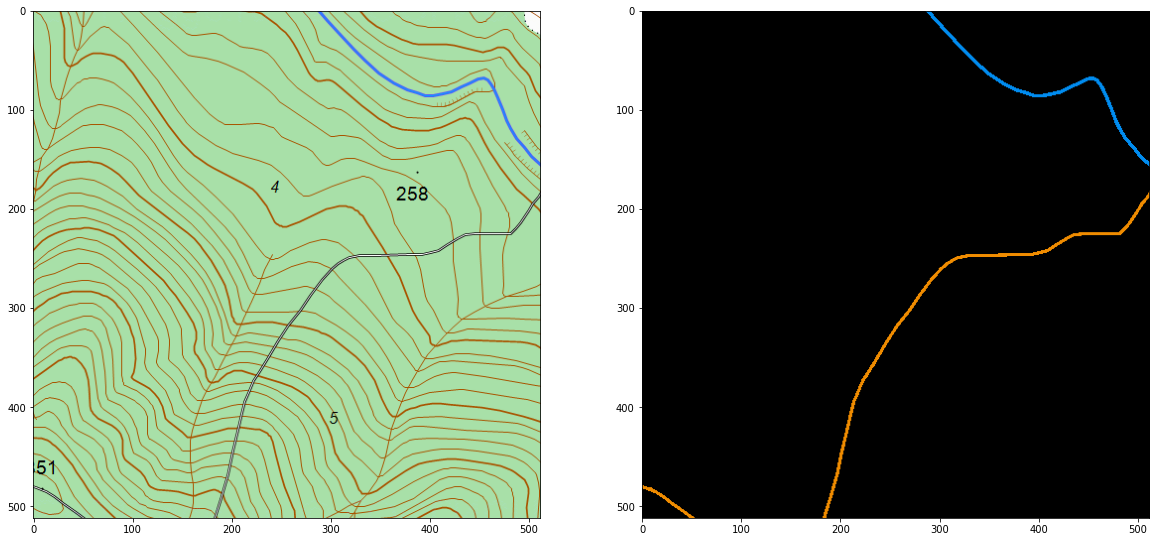

In [ ]:
# Вывожу 1 пару случайных картинок из набора train

img = random.randint(0, len(images_objects_train))
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.imshow(images_objects_train[img])
plt.subplot(122)
plt.imshow(images_segments_train[img])
plt.show()

# Создание выборки

In [ ]:
import numpy as np
# from   tensorflow.keras.utils import to_categorical
# from   sklearn.model_selection import train_test_split

In [ ]:
num_classes = 10 # Объявляю количество классов
directory   = '/content/drive/My Drive/MSP/Segmentation objects/' # Директория сохранения выборки

In [ ]:
# color_font    = [   0,   0,   0 ] # фон
# color_river   = [   0, 140, 240 ] # река
# color_asphalt = [ 240,   0,   0 ] # асфальтированная дорога
# color_dirt    = [ 240, 140,   0 ] # грунтовая дорога
# color_trail   = [ 240, 240,   0 ] # тропа
# color_build   = [ 240,   0, 240 ] # здание
# color_rock    = [ 140, 140,   0 ] # скала
# color_lake    = [   0, 240, 240 ] # озеро
# color_glacier = [   0,   0, 240 ] # ледник
# color_bridge  = [ 140,   0,   0 ] # мост

In [ ]:
def to_categorical(index, num_classes):
    return np.eye(num_classes, dtype='uint8')[index]

In [ ]:
# Функция преобразования пикселя сегментированного изображения в индекс

def color_to_index(color):
    index = 0                                                                                # фон
    if   (      color[0] <  20) and (      color[1] <  20) and ( color[2] <  20) : index = 0 # фон
    elif (      color[0] <  20) and (120 < color[1] < 160) and ( color[2] > 220) : index = 1 # река
    elif (      color[0] > 220) and (      color[1] <  20) and ( color[2] <  20) : index = 2 # асфальтированная дорога
    elif (      color[0] > 220) and (120 < color[1] < 160) and ( color[2] <  20) : index = 3 # грунтовая дорога
    elif (      color[0] > 220) and (      color[1] > 220) and ( color[2] <  20) : index = 4 # тропа
    elif (      color[0] > 220) and (      color[1] <  20) and ( color[2] > 220) : index = 5 # здание
    elif (120 < color[0] < 160) and (120 < color[1] < 160) and ( color[2] <  20) : index = 6 # скала
    elif (      color[0] <  20) and (      color[1] > 220) and ( color[2] > 220) : index = 7 # озеро
    elif (      color[0] <  20) and (      color[1] <  20) and ( color[2] > 220) : index = 8 # ледник
    elif (120 < color[0] < 160) and (      color[1] <  20) and ( color[2] <  20) : index = 9 # мост
    return index

In [ ]:
# Функция перевода цвета пикслея в to_categorical

def rgb_to_ohe(y, num_classes): 
    y_shape_0 = y.shape[0]
    y_shape_1 = y.shape[1]
    y = y.reshape(y.shape[0] * y.shape[1], 3)
    ytrain = []
    for i in range(len(y)):
        ytrain.append(to_categorical(color_to_index(y[i]), num_classes=num_classes))
    ytrain = np.array(ytrain)
    ytrain = ytrain.reshape(y_shape_0, y_shape_1, num_classes)
    return ytrain

In [ ]:
# Функция формирования yTrain

def yTrain(data, num_classes):
    ytrain = []
    count = len(data)
    i = 1
    for segment in data:
        print('Сегмент', i, 'из', count, end='')
        y = image.img_to_array(segment)
        y = rgb_to_ohe(y, num_classes)
        ytrain.append(y)
        print('\r', end='')
        i += 1
    return np.array(ytrain)

In [ ]:
# Формирование yTrain в виде numpy-массива размерностью: высота - ширина - ohe

y_train  = yTrain(images_segments_train, num_classes)
y_val    = yTrain(images_segments_val  , num_classes)
y_test   = yTrain(images_segments_test , num_classes)

In [ ]:
# Функция формирования xTrain

def xTrain(data):
    xtrain = []
    for img in data:
        xtrain.append(image.img_to_array(img))
    return np.array(xtrain)

In [ ]:
# Формирование xTrain в виде numpy-массива

x_train  = xTrain(images_objects_train)
x_val    = xTrain(images_objects_val  )
x_test   = xTrain(images_objects_test )

In [ ]:
# np.save(directory + 'xTrain.npy', xTrain)
# np.save(directory + 'yTrain.npy', yTrain)

np.save(directory + 'xtrain.npy', x_train)
np.save(directory + 'xval.npy'  , x_val  )
np.save(directory + 'xtest.npy' , x_test )

np.save(directory + 'ytrain.npy', y_train)
np.save(directory + 'yval.npy'  , y_val  )
np.save(directory + 'ytest.npy' , y_test )

# Загрузка выборки

In [ ]:
import numpy as np

In [ ]:
directory   = '/content/drive/My Drive/MSP/Segmentation objects/' # Директория сохранения выборки

In [ ]:
# xTrain = np.load(directory + 'xTrain.npy')
# yTrain = np.load(directory + 'yTrain.npy')

x_train = np.load(directory + 'xtrain.npy')
x_val   = np.load(directory + 'xval.npy'  )
x_test  = np.load(directory + 'xtest.npy' )

y_train = np.load(directory + 'ytrain.npy')
y_val   = np.load(directory + 'yval.npy'  )
y_test  = np.load(directory + 'ytest.npy' )

In [ ]:
# print(xTrain.shape)
# print(yTrain.shape)

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(xTrain[:int(0.8*n)], yTrain[:int(0.8*n)], test_size = int(0.2*n))
# x_test, y_test = (xTrain[int(0.8*n):], yTrain[int(0.8*n):])

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(80, 512, 512, 3)
(10, 512, 512, 3)
(10, 512, 512, 3)
(80, 512, 512, 10)
(10, 512, 512, 10)
(10, 512, 512, 10)


In [ ]:
# del xTrain
# del yTrain
print(x_train[0][0][0])
print(y_train[0][0][0])

[168. 224. 168.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Функции обучения и распознавания

In [ ]:
from PIL import Image # импортируем модель Image для работы с изображениями
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LambdaCallback
import pandas     as pd

In [ ]:
num_classes = 10  # Количество классов
img_width   = 512 # Ширина изображения 
img_height  = 512 # Высота изображения
traindir    = '/content/drive/My Drive/MSP/Segmentation objects/Sources/' # Директория с исходными    файлами
valdir      = '/content/drive/My Drive/MSP/Segmentation objects/Marked/'  # Директория с размеченными файлами
directory   = '/content/drive/My Drive/MSP/Segmentation objects/'         # Директория сохранения выборки
dir_model   = '/content/drive/My Drive/MSP/Models/'                       # Директория сохранения моделей

In [ ]:
# Функция коллбэка

def on_epoch_end(epoch, logs):
    lr = K.get_value(model.optimizer.learning_rate)
    print(" Коэффициент обучения равен", '{:8.2e}'.format(lr))

def CB(filepathCB):
    
    LambdaCB = LambdaCallback(on_epoch_end = on_epoch_end)

    EarlyStopCB = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                verbose = 0,
                                mode = "min",
                                baseline = None,
                                restore_best_weights = False)

    CheckpointCB = ModelCheckpoint(filepath = filepathCB,
                                   monitor ='val_dice_coef',
                                   verbose = 0, 
                                   save_best_only = True,
                                   save_weights_only = True, 
                                   mode = 'max')

    ReduceCB = ReduceLROnPlateau(monitor = 'val_dice_coef',
                                 factor = 0.8,
                                 patience = 3,
                                 verbose = 0,
                                 min_lr = 1E-06)
    
    return [LambdaCB, CheckpointCB, ReduceCB, EarlyStopCB]

In [ ]:
# Функция метрики
# Возвращаю площадь пересечения деленную на площадь объединения двух областей

def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)

In [ ]:
# Функция отображения графика обучения модели

def PltPlot(history):  
    
    plt.figure(1, figsize=(20, 8))

    plt.subplot(121)
    plt.title('dice_coef')
    plt.plot(history.history['dice_coef'], label='Обучающая выборка') 
    plt.plot(history.history['val_dice_coef'], label='Проверочная выборка')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    
    plt.subplot(122)
    plt.title('loss')
    plt.plot(history.history['loss'], label='Обучающая выборка') 
    plt.plot(history.history['val_loss'], label='Проверочная выборка')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля неверных ответов')
    plt.legend()
    
    plt.show()

In [ ]:
# Функция перевода to_categorical в rgb

def index_to_color(index2):
    index = np.argmax(index2) # Получаем индекс максимального элемента
    color=[]
    if   index == 0: color = [   0,   0,   0] # фон
    elif index == 1: color = [   0, 140, 240] # река
    elif index == 2: color = [ 240,   0,   0] # асфальтированная дорога
    elif index == 3: color = [ 240, 140,   0] # грунтовая дорога
    elif index == 4: color = [ 240, 240,   0] # тропа
    elif index == 5: color = [ 240,   0, 240] # здание
    elif index == 6: color = [ 140, 140,   0] # скала
    elif index == 7: color = [   0, 240, 240] # озеро
    elif index == 8: color = [   0,   0, 240] # ледник
    elif index == 9: color = [ 140,   0,   0] # мост
    return color # Возвращаем цвет пикслея

In [ ]:
# Функция визуализации сегментированных изображений

def ProcessImage(model, n_classes = 10):
    idx = np.random.randint(0, len(x_test)-1) # Получаем случайный индекс
    predict = np.array(model.predict(x_test[idx].reshape(1, img_width, img_height, 3))) # Предиктим картику
    pr = predict[0] # Берем нулевой элемент из перидкта
    pr1 = [] # Пустой лист под сегментированную картинку из predicta
    pr2 = [] # Пустой лист под сегменитрованную картинку из y_test
    pr = pr.reshape(-1, n_classes) # Решейпим предикт
    yr = y_test[idx].reshape(-1, n_classes) # Решейпим y_test
    for k in range(len(pr)): # Проходим по всем уровням (количесвто классов)
        pr1.append(index_to_color(pr[k])) # Переводим индекс в писксель
        pr2.append(index_to_color(yr[k])) # Переводим индекс в писксель
    pr1 = np.array(pr1) # Преобразуем в numpy
    pr1 = pr1.reshape(img_width, img_height, 3) # Решейпим к размеру изображения
    pr2 = np.array(pr2) # Преобразуем в numpy
    pr2 = pr2.reshape(img_width, img_height, 3) # Решейпим к размеру изображения
    img = Image.fromarray(pr1.astype('uint8')) # Получаем картику из предикта
    plt.figure(1, figsize=(25, 10))
    plt.subplot(131)
    plt.imshow(Image.fromarray(x_test[idx].astype('uint8'))) # Отображаем оригинальное изображение
    plt.subplot(132)
    plt.imshow(Image.fromarray(pr2.astype('uint8'))) # Отображаем сегментированное изображение из y_test
    plt.subplot(133)
    plt.imshow(img.convert('RGBA')) # Отображаем сегментированное изображение из predicta
    plt.show()

In [ ]:
# Определение совпадения y_true и y_pred в процентах

def DataFrameEval(model, x_test, y_test, n_classes=10):

    name_obj  = ['фон', 'река', 'асфальтированная дорога', 'грунтовая дорога', 'тропа', 'здание', 'скала', 'озеро', 'ледник', 'мост']
    data = []

    for idx in range(0, len(x_test)):    
        yt = y_test[idx].reshape(-1, n_classes) # Решейпим y_test
        y_pred = np.array(model.predict(x_test[idx].reshape(1, img_width, img_height, 3))) # Предиктим картику
        yp = y_pred[0].reshape(-1, n_classes) # Решейпим предикт
    
        area_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        area_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        area_eval = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
        for i in range(len(yt)):
            area_true[np.argmax(yt[i])] += 1
            if np.argmax(yt[i]) == np.argmax(yp[i]):
                area_pred[np.argmax(yt[i])] += 1

        for j in range(len(area_eval)):
            if area_true[j] > 5:
                area_eval[j] = round(100 * area_pred[j]/area_true[j], 2)
            else:
                area_eval[j] = '-'
    
        data.append(area_eval)

    return pd.DataFrame(data, index=range(len(x_test)), columns=name_obj)

# Загрузка библиотек для модели

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow        as tf

# Модель Unet
loss: 0.0498 - dice_coef: 0.9732

## Функция модели

In [ ]:
# Функция создания сети

def Unet(num_classes = 2, input_shape= (512, 512, 3)):
    
    img_input = Input(input_shape)                                      # Создаем входной слой с размерностью input_shape

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input) # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)      # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    block_1_out = Activation('relu')(x)                                 # Добавляем слой Activation и запоминаем в переменной block_1_out
    
    block_1_out_mask = Conv2D(64, (1, 1), padding='same')(block_1_out)  # Добавляем Conv2D-маску к текущему слою и запоминаем в переменную block_1_out_mask

    x = MaxPooling2D()(block_1_out) # Добавляем слой MaxPooling2D

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)     # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x) # Добавляем слой Activation

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)     # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    block_2_out = Activation('relu')(x)                                 # Добавляем слой Activation и запоминаем в переменной block_2_out

    block_2_out_mask = Conv2D(128, (1, 1), padding='same')(block_2_out) # Добавляем Conv2D-маску к текущему слою и запоминаем в переменную block_2_out_mask
    
    x = MaxPooling2D()(block_2_out)                                     # Добавляем слой MaxPooling2D

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)     # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)     # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)     # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    block_3_out = Activation('relu')(x)                                 # Добавляем слой Activation и запоминаем в переменной block_3_out

    block_3_out_mask = Conv2D(256, (1, 1), padding='same')(block_3_out) # Добавляем Conv2D-маску к текущему слою и запоминаем в переменную block_3_out_mask
        
    x = MaxPooling2D()(block_3_out)                                     # Добавляем слой MaxPooling2D

     # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)     # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)     # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)     # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    block_4_out = Activation('relu')(x)                                 # Добавляем слой Activation и запоминаем в переменной block_4_out

    block_4_out_mask = Conv2D(512, (1, 1), padding='same')(block_4_out) # Добавляем Conv2D-маску к текущему слою и запоминаем в переменную block_4_out_mask
            
    x = MaxPooling2D()(block_4_out)                                     # Добавляем слой MaxPooling2D

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)     # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)     # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)     # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation
    
    for_pretrained_weight = MaxPooling2D()(x)                           # Добавляем слой MaxPooling2D
 
    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x) # Добавляем слой Conv2DTranspose с 512 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = concatenate([x, block_4_out, block_4_out_mask])                 # Объединем текущий слой со слоем block_4_out и слоем-маской block_4_out_mask
    x = Conv2D(512, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 512 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 512 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x) # Добавляем слой Conv2DTranspose с 256 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = concatenate([x, block_3_out, block_3_out_mask])                 # Объединем текущий слой со слоем block_3_out и слоем-маской block_3_out_mask
    x = Conv2D(256, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 256 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 256 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x) # Добавляем слой Conv2DTranspose с 128 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = concatenate([x, block_2_out, block_2_out_mask])                 # Объединем текущий слой со слоем block_2_out и слоем-маской block_2_out_mask
    x = Conv2D(128, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    x = Conv2D(128, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                         # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                           # Добавляем слой Activation

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x) # Добавляем слой Conv2DTranspose с 64 нейронами
    x = BatchNormalization()(x)                                        # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                          # Добавляем слой Activation

    x = concatenate([x, block_1_out, block_1_out_mask])                # Объединем текущий слой со слоем block_1_out и слоем-маской block_1_out_mask
    x = Conv2D(64, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                        # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                          # Добавляем слой Activation

    x = Conv2D(64, (3, 3), padding='same')(x)                          # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                        # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                          # Добавляем слой Activation

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x) # Добавляем Conv2D-Слой с softmax-активацией на num_classes-нейронов

    model = Model(img_input, x)                                        # Создаем модель с входом 'img_input' и выходом 'x'

    # Компилируем модель 
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    
    return model                                                       # Возвращаем сформированную модель

## Обучение модели

In [ ]:
model = Unet(num_classes, (img_width, img_height,3))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 512, 512, 64) 256         block1_conv1[0][0]               
__________________________________________________________________________________________________
activation_75 (Activation)      (None, 512, 512, 64) 0           batch_normalization_75[0][0]     
____________________________________________________________________________________________

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/Unet/weights-Unet.h5' # Директория сохранения весов модели

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=2,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks=CB(filepathCB)) # callbacks=[LambdaCB, CheckpointCB, ReduceCB, EarlyStopCB]

Epoch 1/100
40/40 [==============================] - 16s 355ms/step - loss: 0.4934 - dice_coef: 0.7759 - val_loss: 1263.5393 - val_dice_coef: 0.0405
 Коэффициент обучения равен 1.00e-03
Epoch 2/100
40/40 [==============================] - 14s 342ms/step - loss: 0.1185 - dice_coef: 0.9491 - val_loss: 3.5081 - val_dice_coef: 0.6366
 Коэффициент обучения равен 1.00e-03
Epoch 3/100
40/40 [==============================] - 14s 342ms/step - loss: 0.0979 - dice_coef: 0.9536 - val_loss: 6.0079 - val_dice_coef: 0.1334
 Коэффициент обучения равен 1.00e-03
Epoch 4/100
40/40 [==============================] - 14s 342ms/step - loss: 0.0924 - dice_coef: 0.9572 - val_loss: 0.5138 - val_dice_coef: 0.9135
 Коэффициент обучения равен 1.00e-03
Epoch 5/100
40/40 [==============================] - 14s 343ms/step - loss: 0.0865 - dice_coef: 0.9601 - val_loss: 0.3830 - val_dice_coef: 0.8551
 Коэффициент обучения равен 8.00e-04
Epoch 6/100
40/40 [==============================] - 14s 343ms/step - loss: 0.0784

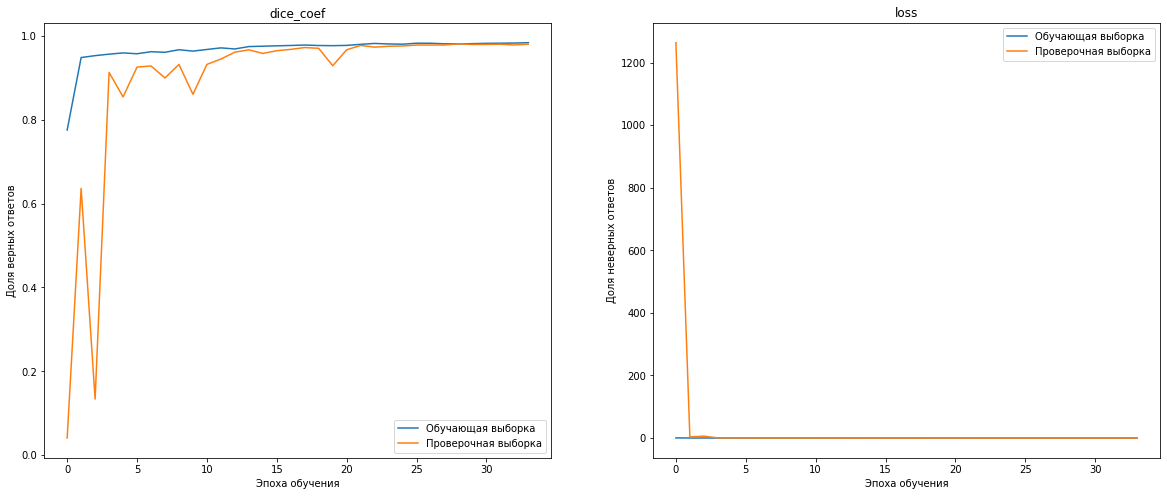

In [ ]:
PltPlot(history)

## Распознавание

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/Unet/weights-Unet.h5' # Директория сохранения весов модели
model = Unet(num_classes, (img_width, img_height,3))
model.load_weights(filepathCB)

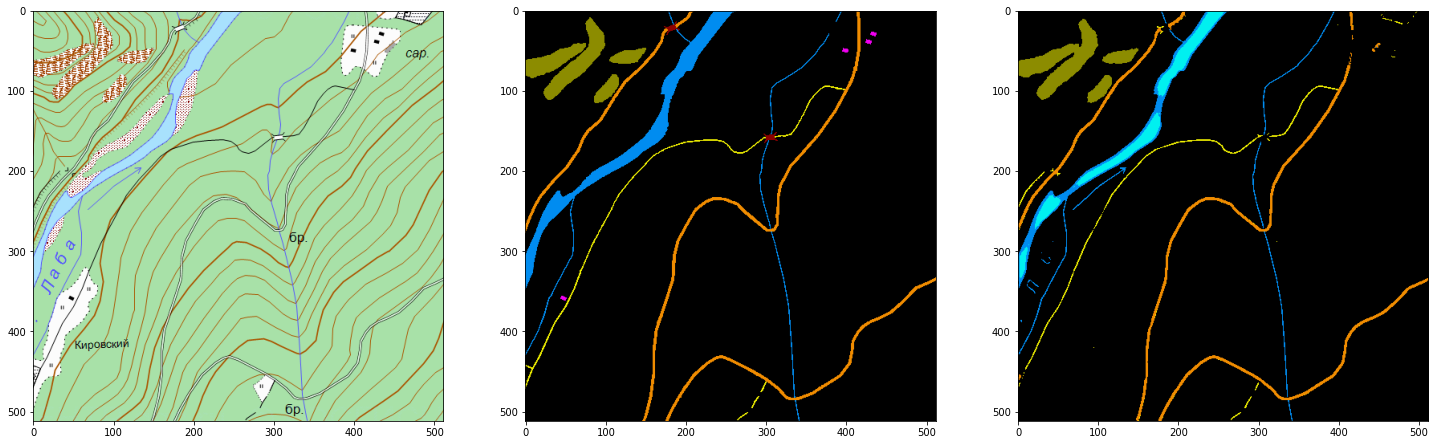

In [ ]:
ProcessImage(model, num_classes)

In [ ]:
model.evaluate(x_test, y_test, batch_size=10, verbose=1)

1/1 [==============================] - 1s 993ms/step - loss: 0.0498 - dice_coef: 0.9732


[0.04978042095899582, 0.9732062220573425]

In [ ]:
DataFrameEval(model, x_test, y_test, num_classes).head(len(x_test))

,фон,река,асфальтированная дорога,грунтовая дорога,тропа,здание,скала,озеро,ледник,мост
0,99.16,73.27,-,-,-,-,98.05,-,92.73,-
1,99.93,90.37,-,-,57.61,0,95.66,69.96,-,-
2,99.85,88.83,-,-,37.19,0,-,89.91,-,-
3,99.34,75.61,-,-,-,-,98.07,-,96.57,-
4,99.10,76.36,-,-,-,-,98,89.78,97.86,-
5,99.61,47.50,-,91.65,83.92,0,94.82,-,-,0
6,99.56,95.07,97.36,92.22,46.75,-,-,-,-,-
7,99.62,91.65,96.59,87.94,25.44,0,-,-,-,-
8,99.73,93.71,-,89.53,78.74,-,-,-,-,0
9,99.93,95.68,94.16,-,86.04,-,-,-,-,0


# Модель LinkNet
loss: 0.0505 - dice_coef: 0.9702

## Функция модели

In [ ]:
def LinkNet(num_classes = 10, input_shape= (512, 512, 3)):
    
    img_input = Input(input_shape) # Создаем входной слой с размерностью input_shape

    # Block 1

    x = Conv2D(128, (3, 3), padding = 'same', name = 'block1_conv1')(img_input)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding = 'same', name = 'block1_conv2')(x)
    block_1_out = Activation('relu')(x) # Добавляем слой Activation и запоминаем в переменной block_1_out
    
    x = MaxPooling2D()(block_1_out) # уменьшаем размерность в 2 раза

    # Block 2

    x = Conv2D(256, (3, 3), padding = 'same', name = 'block2_conv1')(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding = 'same', name = 'block2_conv2')(x)
    block_2_out = Activation('relu')(x) # Добавляем слой Activation и запоминаем в переменной block_2_out

    x = MaxPooling2D()(block_2_out) # уменьшаем размерность в 2 раза

    # Block 3

    x = Conv2D(512, (3, 3), padding = 'same', name = 'block3_conv1')(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding = 'same', name = 'block3_conv2')(x)
    block_3_out = Activation('relu')(x) # Добавляем слой Activation и запоминаем в переменной block_3_out

    x = MaxPooling2D()(block_3_out) # уменьшаем размерность в 2 раза

    # Block 4

    x = Conv2D(1024, (3, 3), padding = 'same', name = 'block4_conv1')(x)
    x = Activation('relu')(x)

    x = Conv2D(1024, (3, 3), padding = 'same', name = 'block4_conv2')(x)
    block_4_out = Activation('relu')(x) # Добавляем слой Activation и запоминаем в переменной block_4_out

    x = MaxPooling2D()(block_4_out) # уменьшаем размерность в 2 раза

    # UP 1

    x = Conv2DTranspose(1024, (2, 2), strides = (2, 2), padding = 'same')(x) # увеличиваем размерность в 2 раза
    x = Activation('relu')(x)

    x = Conv2D(1024, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Conv2D(1024, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Add()([x, block_4_out]) # добавляем первый понижающим слоем

    # UP 2

    x = Conv2DTranspose(512, (2, 2), strides = (2, 2), padding = 'same')(x) # увеличиваем размерность в 2 раза
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Add()([x, block_3_out]) # добавляем первый понижающим слоем

    # UP 3

    x = Conv2DTranspose(256, (2, 2), strides = (2, 2), padding = 'same')(x) # увеличиваем размерность в 2 раза
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Add()([x, block_2_out]) # добавляем первый понижающим слоем
    
    # UP 4

    x = Conv2DTranspose(128, (2, 2), strides = (2, 2), padding = 'same')(x) # увеличиваем размерность в 2 раза
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding = 'same')(x)
    x = Activation('relu')(x)

    x = Add()([x, block_1_out]) # добавляем первый понижающим слоем

    x = Conv2D(num_classes, (3, 3), activation = 'softmax', padding = 'same')(x)

    model = Model(img_input, x) # Создаем модель с входом 'img_input' и выходом 'x'

    # Компилируем модель 
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    
    return model # Возвращаем сформированную модель

## Обучение модели

In [ ]:
model = LinkNet(num_classes, (img_width, img_height, 3))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 128 3584        input_2[0][0]                    
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 512, 512, 128 0           block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 128 147584      activation_20[0][0]              
____________________________________________________________________________________________

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/LinkNet/weights-LinkNet3.h5' # Директория сохранения весов модели

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=2,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks=CB(filepathCB)) # callbacks=[LambdaCB, CheckpointCB, ReduceCB, EarlyStopCB]

Epoch 1/100
40/40 [==============================] - 23s 534ms/step - loss: 6.4125 - dice_coef: 0.8998 - val_loss: 1.1820 - val_dice_coef: 0.8920
 Коэффициент обучения равен 0.001
Epoch 2/100
40/40 [==============================] - 21s 523ms/step - loss: 0.2576 - dice_coef: 0.9376 - val_loss: 0.3292 - val_dice_coef: 0.8695
 Коэффициент обучения равен 0.001
Epoch 3/100
40/40 [==============================] - 21s 523ms/step - loss: 0.1753 - dice_coef: 0.9487 - val_loss: 0.4694 - val_dice_coef: 0.8930
 Коэффициент обучения равен 0.001
Epoch 4/100
40/40 [==============================] - 21s 523ms/step - loss: 0.1664 - dice_coef: 0.9457 - val_loss: 0.2904 - val_dice_coef: 0.9046
 Коэффициент обучения равен 0.001
Epoch 5/100
40/40 [==============================] - 21s 523ms/step - loss: 0.1565 - dice_coef: 0.9429 - val_loss: 0.3134 - val_dice_coef: 0.9035
 Коэффициент обучения равен 0.001
Epoch 6/100
40/40 [==============================] - 21s 523ms/step - loss: 0.1258 - dice_coef: 0.95

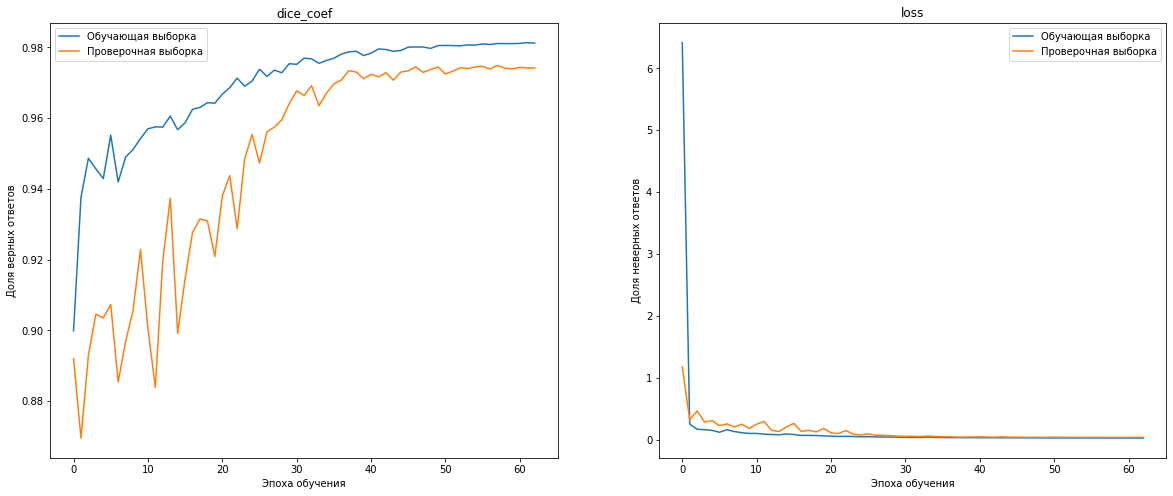

In [ ]:
PltPlot(history) # Отображаю график обучения модели

## Распознавание

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/LinkNet/weights-LinkNet.h5' # Директория сохранения весов модели
model = LinkNet(num_classes, (img_width, img_height,3))
model.load_weights(filepathCB)

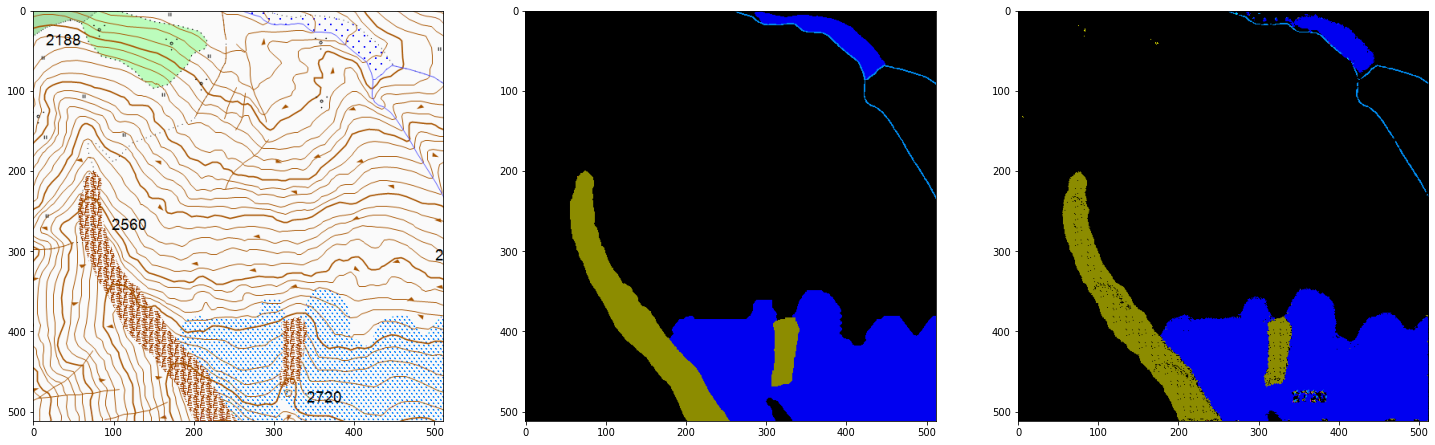

In [ ]:
ProcessImage(model, num_classes)

In [ ]:
model.evaluate(x_test, y_test, batch_size=10, verbose=1)

1/1 [==============================] - 14s 14s/step - loss: 0.0505 - dice_coef: 0.9702


[0.05052875727415085, 0.9701750874519348]

In [ ]:
DataFrameEval(model, x_test, y_test, num_classes).head(len(x_test))

,фон,река,асфальтированная дорога,грунтовая дорога,тропа,здание,скала,озеро,ледник,мост
0,98.21,86.54,-,-,-,-,89.66,-,97.23,-
1,99.89,82.06,-,-,61.04,80,93.15,83.52,-,-
2,99.87,87.08,-,-,47.63,85.71,-,95.24,-,-
3,99.08,78.84,-,-,-,-,92.05,-,96.46,-
4,98.78,85.29,-,-,-,-,92.24,62.57,97.46,-
5,99.60,98.77,-,89.68,78.22,82.96,94.89,-,-,0
6,99.57,92.97,87.11,76.3,52.99,-,-,-,-,-
7,99.53,92.42,85.26,58.32,43.93,52.94,-,-,-,-
8,99.74,90.80,-,87.38,72.88,-,-,-,-,0
9,99.93,94.29,77.68,-,80.4,-,-,-,-,0


# Модель PSPNet
loss: 0.0584 - dice_coef: 0.9680

## Функция модели

In [ ]:
def PSPNet(num_classes = 10, input_shape= (512, 512, 3)):
    
    img_input = Input(input_shape) # Создаем входной слой с размерностью input_shape

    x = Conv2D(256, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='block1_conv2')(x)
    x = Activation('relu')(x)
    
    # pooling пирамида

    block_1_out = MaxPooling2D((2,2))(x)
    block_2_out = MaxPooling2D((4,4))(x)
    block_3_out = MaxPooling2D((8,8))(x)
    block_4_out = MaxPooling2D((16,16))(x)
    
    # Сверточные слои

    block_1_out = Conv2D(256, (3, 3), padding='same', name='block2_conv1')(block_1_out)
    block_1_out = Activation('relu')(block_1_out)
    block_1_out = Conv2D(256, (3, 3), padding='same', name='block2_conv2')(block_1_out)
    block_1_out = Activation('relu')(block_1_out)
    
    block_2_out = Conv2D(256, (3, 3), padding='same', name='block2_conv3')(block_2_out)
    block_2_out = Activation('relu')(block_2_out)
    block_2_out = Conv2D(256, (3, 3), padding='same', name='block2_conv4')(block_2_out)
    block_2_out = Activation('relu')(block_2_out)

    block_3_out = Conv2D(256, (3, 3), padding='same', name='block2_conv5')(block_3_out)
    block_3_out = Activation('relu')(block_3_out)
    block_3_out = Conv2D(256, (3, 3), padding='same', name='block2_conv6')(block_3_out)
    block_3_out = Activation('relu')(block_3_out)

    block_4_out = Conv2D(256, (3, 3), padding='same', name='block2_conv7')(block_4_out)
    block_4_out = Activation('relu')(block_4_out)
    block_4_out = Conv2D(256, (3, 3), padding='same', name='block2_conv8')(block_4_out)
    block_4_out = Activation('relu')(block_4_out)

    # Увеличиваем размерность

    block_1_out = Conv2DTranspose(256,   (2, 2), strides=(2,2), padding='same')(block_1_out)
    block_1_out = Activation('relu')(block_1_out)

    block_2_out = Conv2DTranspose(256,   (4, 4), strides=(4,4), padding='same')(block_2_out)
    block_2_out = Activation('relu')(block_2_out)

    block_3_out = Conv2DTranspose(256,   (8, 8), strides=(8,8), padding='same')(block_3_out)
    block_3_out = Activation('relu')(block_3_out)

    block_4_out = Conv2DTranspose(256, (16, 16), strides=(16,16), padding='same')(block_4_out)
    block_4_out = Activation('relu')(block_4_out)

    # объединяем слои

    out = concatenate([block_1_out, block_2_out, block_3_out, block_4_out])
    out = Conv2D(num_classes, (3, 3), activation = 'softmax', padding = 'same')(out)

    model = Model(img_input, out) # Создаем модель с входом 'img_input' и выходом 'out'

    # Компилируем модель

    model.compile(optimizer=Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    
    return model # Возвращаем сформированную модель

## Обучение модели

In [ ]:
model = PSPNet(num_classes, (img_width, img_height, 3))
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 256 7168        input_5[0][0]                    
__________________________________________________________________________________________________
activation_68 (Activation)      (None, 512, 512, 256 0           block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 256 590080      activation_68[0][0]              
____________________________________________________________________________________________

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/PSPNet/weights-PSPNet.h5' # Директория сохранения весов модели

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=2,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks=CB(filepathCB)) # callbacks=[LambdaCB, CheckpointCB, ReduceCB, EarlyStopCB]

Epoch 1/100
40/40 [==============================] - 24s 581ms/step - loss: 0.7233 - dice_coef: 0.8745 - val_loss: 0.5173 - val_dice_coef: 0.8148
 Коэффициент обучения равен 1.00e-03
Epoch 2/100
40/40 [==============================] - 23s 573ms/step - loss: 0.2448 - dice_coef: 0.9124 - val_loss: 0.4790 - val_dice_coef: 0.8732
 Коэффициент обучения равен 1.00e-03
Epoch 3/100
40/40 [==============================] - 23s 573ms/step - loss: 0.2323 - dice_coef: 0.9231 - val_loss: 0.5857 - val_dice_coef: 0.8855
 Коэффициент обучения равен 1.00e-03
Epoch 4/100
40/40 [==============================] - 23s 574ms/step - loss: 0.2094 - dice_coef: 0.9243 - val_loss: 0.7124 - val_dice_coef: 0.8882
 Коэффициент обучения равен 1.00e-03
Epoch 5/100
40/40 [==============================] - 23s 572ms/step - loss: 0.2557 - dice_coef: 0.9234 - val_loss: 0.6702 - val_dice_coef: 0.8880
 Коэффициент обучения равен 8.00e-04
Epoch 6/100
40/40 [==============================] - 23s 573ms/step - loss: 0.1884 - 

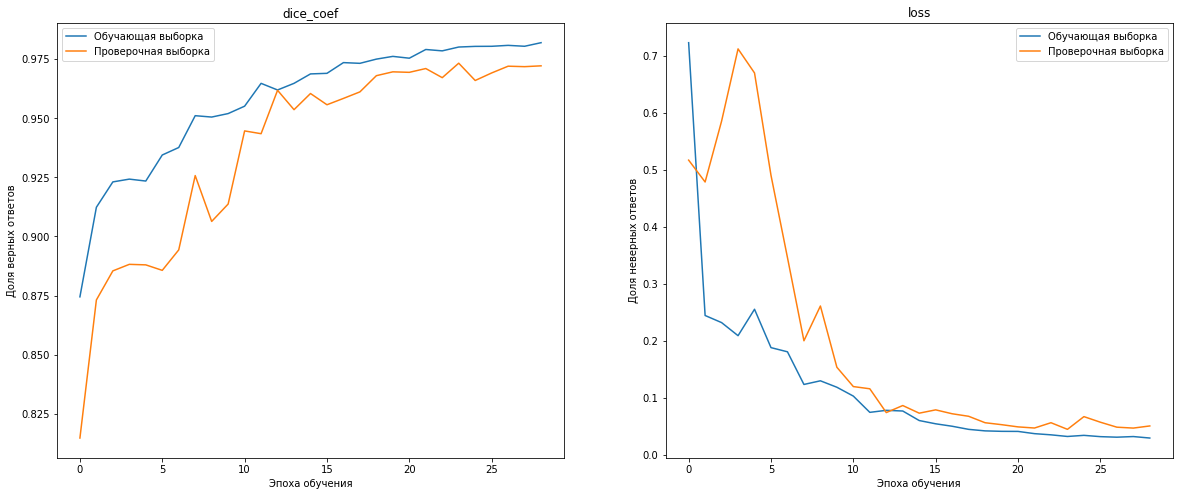

In [ ]:
PltPlot(history) # Отображаю график обучения модели

## Распознавание

In [ ]:
filepathCB = '/content/drive/My Drive/MSP/Models/PSPNet/weights-PSPNet.h5' # Директория сохранения весов модели
model = PSPNet(num_classes, (img_width, img_height, 3))
model.load_weights(filepathCB)

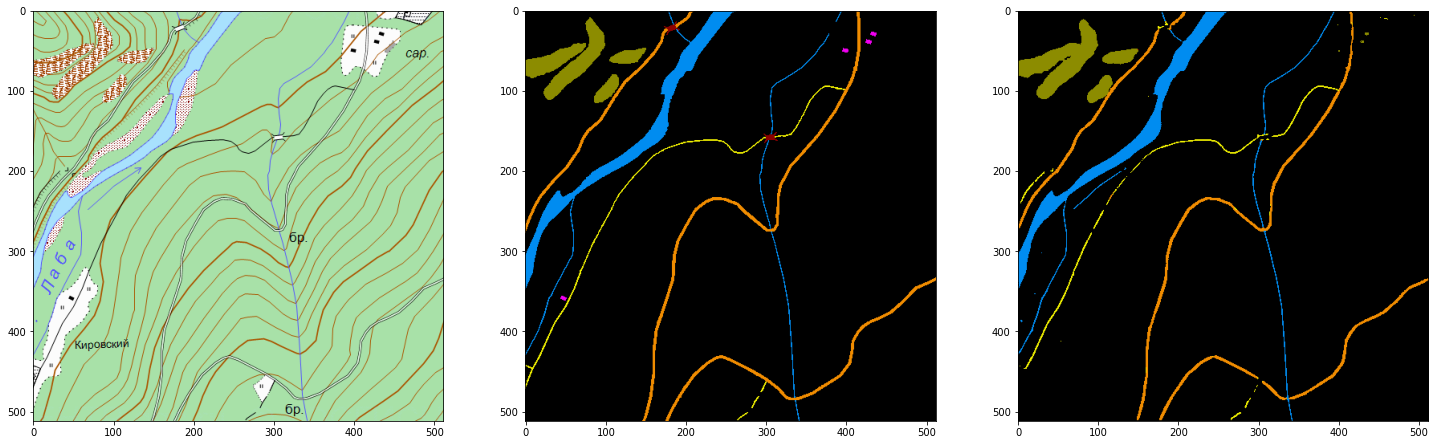

In [ ]:
ProcessImage(model, num_classes)

In [ ]:
model.evaluate(x_test, y_test, batch_size=2, verbose=1)

5/5 [==============================] - 1s 178ms/step - loss: 0.0584 - dice_coef: 0.9680


[0.05837439373135567, 0.9680386781692505]

In [ ]:
DataFrameEval(model, x_test, y_test, num_classes).head(len(x_test))

,фон,река,асфальтированная дорога,грунтовая дорога,тропа,здание,скала,озеро,ледник,мост
0,99.06,66.54,-,-,-,-,55.26,-,96.18,-
1,99.89,78.56,-,-,67.22,0,97.88,77.29,-,-
2,99.93,85.23,-,-,72.27,0,-,99.03,-,-
3,99.40,53.64,-,-,-,-,78.25,-,97.9,-
4,99.24,79.50,-,-,-,-,97.02,97.6,98.09,-
5,99.55,98.97,-,89.84,80.9,0,96.75,-,-,0
6,99.53,93.74,76.21,82.25,61.3,-,-,-,-,-
7,99.60,94.67,95.12,73.08,43.08,0,-,-,-,-
8,99.67,91.68,-,83.74,82.34,-,-,-,-,0
9,99.88,96.10,89.1,-,86.04,-,-,-,-,0


# Черновики

In [ ]:
# Совпадение y_test и predicta
n_classes = 10
L = 0
for idx in range(0, len(x_test)):    
    yt = y_test[idx].reshape(-1, n_classes) # Решейпим y_test
    y_pred = np.array(model.predict(x_test[idx].reshape(1, img_width, img_height, 3))) # Предиктим картику
    yp = y_pred[0].reshape(-1, n_classes) # Решейпим предикт
    k = 0
    for i in range(len(yt)):
        if np.argmax(yt[i]) == np.argmax(yp[i]):
            k += 1
    L += k/len(yt)
    print('Картинка', idx, '-', round(100 * k/len(yt), 2), '%')
print('Среднее', '   -', round(100 * L/len(x_test), 2), '%')

Картинка 0 - 89.09 %
Картинка 1 - 99.26 %
Картинка 2 - 99.1 %
Картинка 3 - 97.67 %
Картинка 4 - 97.23 %
Картинка 5 - 97.04 %
Картинка 6 - 98.64 %
Картинка 7 - 98.19 %
Картинка 8 - 98.6 %
Картинка 9 - 99.48 %
Среднее    - 97.43 %
